# EDA of IBM Dataset

Conduct Exploratory Data Analyis of processed dataset to view:

* Distibutions of Annual Salary by:
    - Gender
    - JobLevel
    - Department
    - Education Field
* Correlation Matrix
* Box Plot of pay by Gender within Job Levels

**Notes:** From cleaning the gender counts were Male=882 and Female=588

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## import cleaned data
data = pd.read_csv('..\data\processed\cleaned_hr_data.csv')


In [3]:
data.describe()

,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobLevel,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,YearsAtCompany,AnnualSalary
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,802.485714,9.192517,2.912925,2.721769,0.600000,2.063946,0.717007,15.209524,2.712245,0.793878,2.761224,7.008163,137053.605442
std,403.509100,8.106864,1.024165,1.093082,0.490065,1.106940,0.450606,3.659938,1.081209,0.852077,0.706476,6.126525,42285.209396
min,102.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,11.000000,1.000000,0.000000,1.000000,0.000000,62400.000000
25%,465.000000,2.000000,2.000000,2.000000,0.000000,1.000000,0.000000,12.000000,2.000000,0.000000,2.000000,3.000000,99840.000000
50%,802.000000,7.000000,3.000000,3.000000,1.000000,2.000000,1.000000,14.000000,3.000000,1.000000,3.000000,5.000000,137280.000000
75%,1157.000000,14.000000,4.000000,4.000000,1.000000,3.000000,1.000000,18.000000,4.000000,1.000000,3.000000,9.000000,174200.000000
max,1499.000000,29.000000,5.000000,4.000000,1.000000,5.000000,1.000000,25.000000,4.000000,3.000000,4.000000,40.000000,208000.000000


## Distibutions

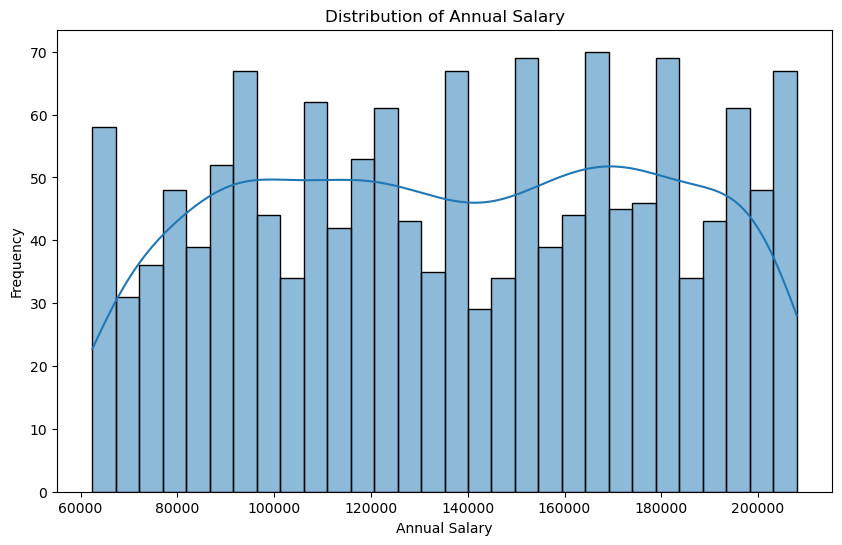

In [4]:
# distributions plot of annual salary
plt.figure(figsize=(10, 6))
sns.histplot(data['AnnualSalary'], bins=30, kde=True)
plt.title('Distribution of Annual Salary')
plt.xlabel('Annual Salary')
plt.ylabel('Frequency')
plt.show()

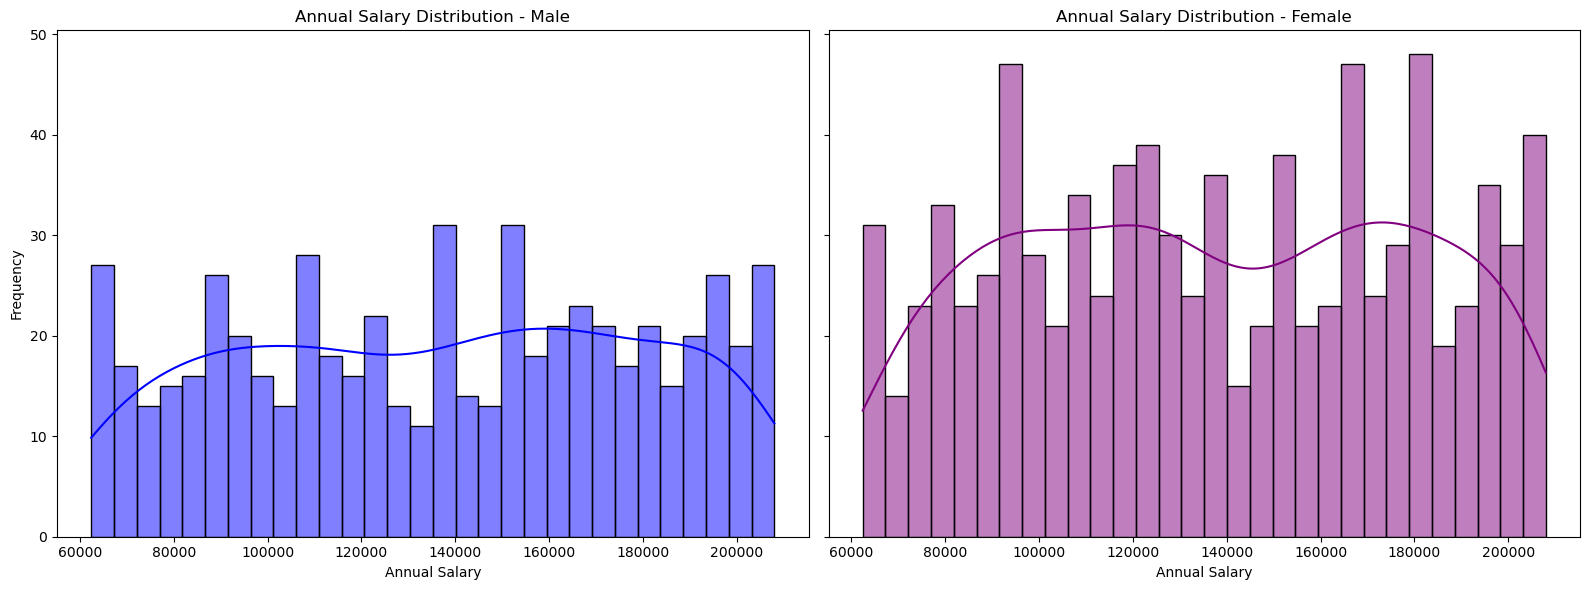

In [5]:
# Histogram of Distribution by Gender
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot for Male
sns.histplot(
    data=data[data['Gender'] == 0],
    x='AnnualSalary',
    bins=30,
    kde=True,
    color='blue',
    ax=axes[0]
)
axes[0].set_title('Annual Salary Distribution - Male')
axes[0].set_xlabel('Annual Salary')
axes[0].set_ylabel('Frequency')

# Plot for Female
sns.histplot(
    data=data[data['Gender'] == 1],
    x='AnnualSalary',
    bins=30,
    kde=True,
    color='purple',
    ax=axes[1]
)
axes[1].set_title('Annual Salary Distribution - Female')
axes[1].set_xlabel('Annual Salary')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

There isn't a single clear peak in salary distribution for either gender, they do not follow a normal distribution. Both show multiple peaks but especially more prominent in the female salary distribution.

C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3040087872.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3040087872.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3040087872.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3040087872.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklab

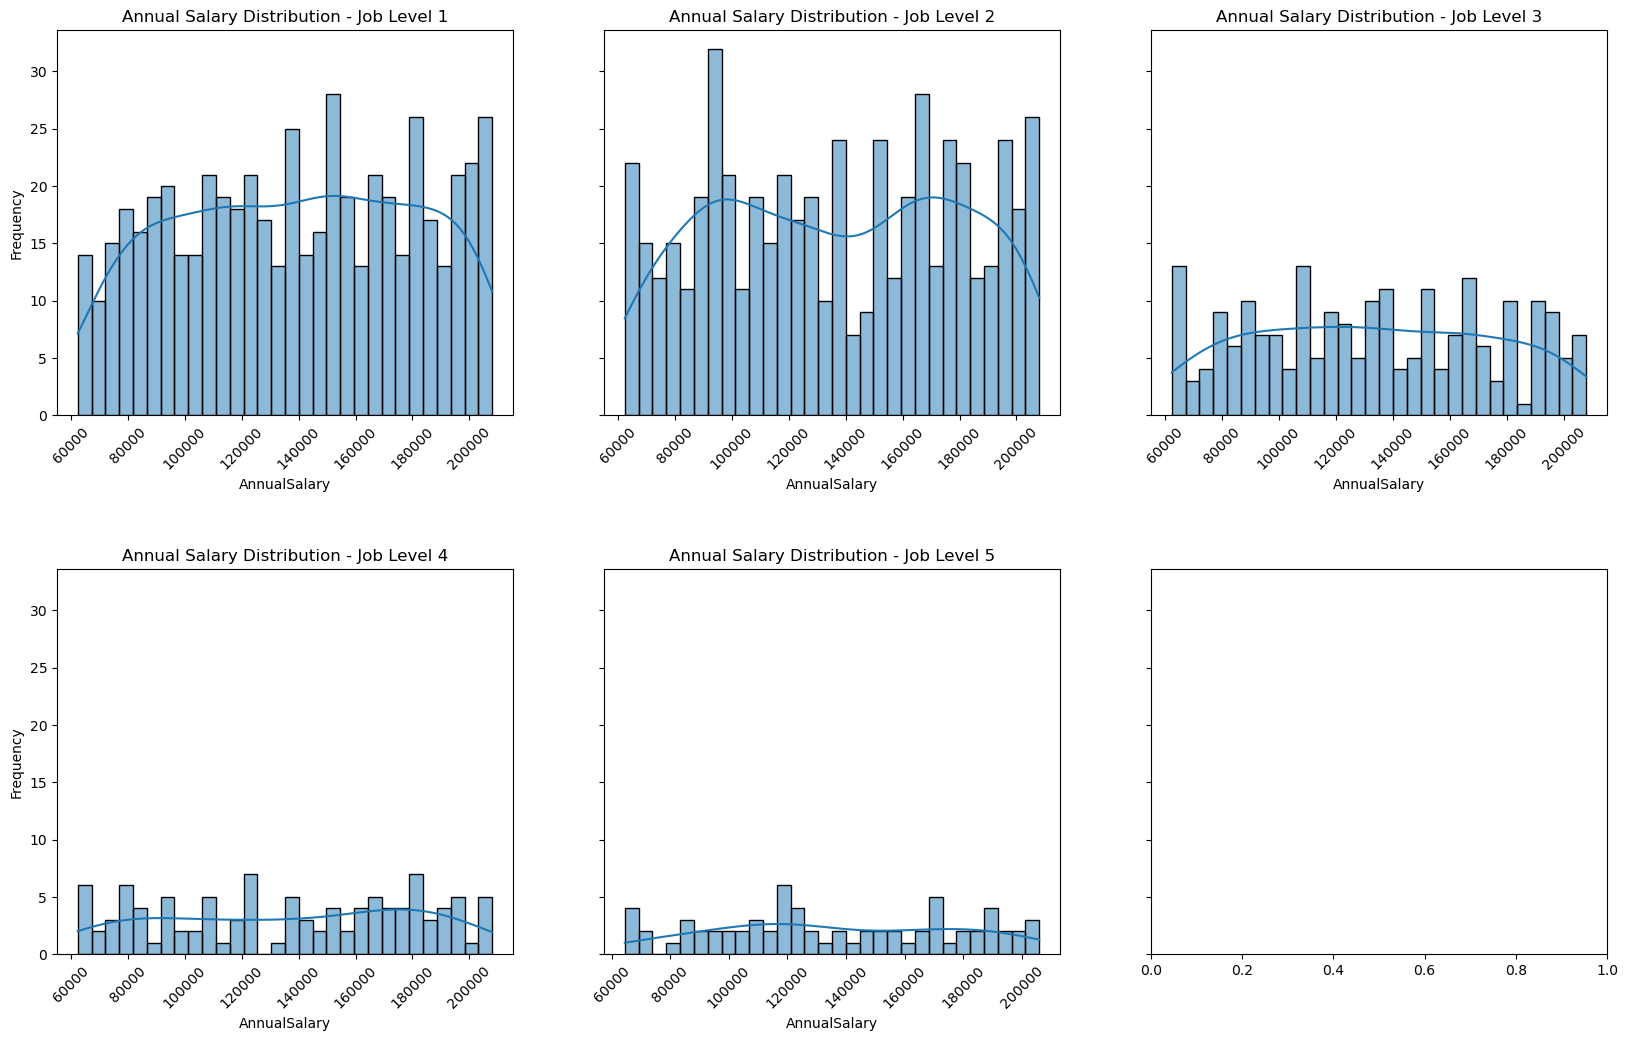

In [6]:
## Distribution plots by JobLevel (1-5)

fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharey=True)

job_levels = sorted(data['JobLevel'].unique())

for i, level in enumerate(job_levels):
    ax = axes[i // 3, i % 3]
    sns.histplot(
        data=data[data['JobLevel'] == level],
        x='AnnualSalary',
        bins=30,
        kde=True,
        ax=ax
    )
    ax.set_title(f'Annual Salary Distribution - Job Level {level}')
    # ax.set_xlabel('Annual Salary')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.figure.subplots_adjust(hspace=0.4)


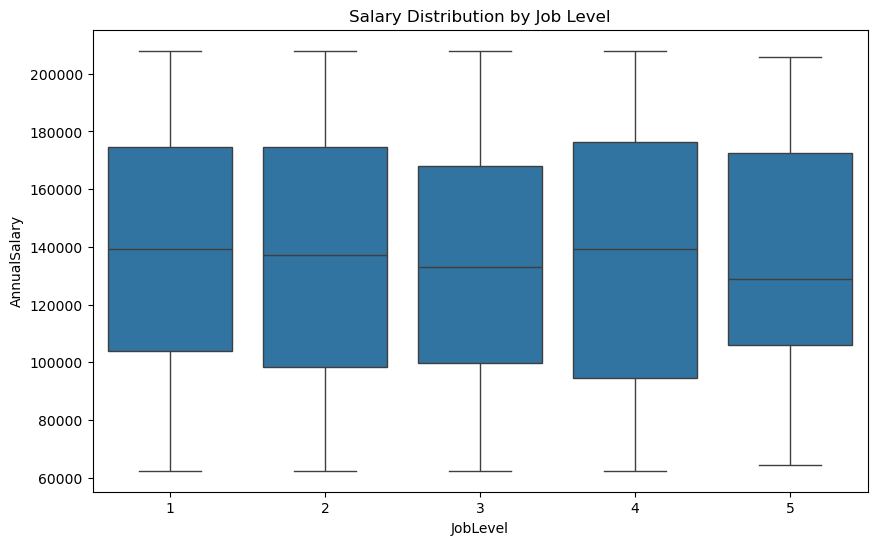

In [11]:
# Histogram is too subtle to see the difference, so we will use boxplot instead
plt.figure(figsize=(10, 6))
sns.boxplot(x='JobLevel', y='AnnualSalary', data=data)
plt.title('Salary Distribution by Job Level')
plt.show()

In [12]:
# Summary statistics by JobLevel for further insight
data.groupby('JobLevel')['AnnualSalary'].describe()

,count,mean,std,min,25%,50%,75%,max
JobLevel,,,,,,,,
1,543.0,138854.364641,41669.394893,62400.0,104000.0,139360.0,174720.0,208000.0
2,534.0,136800.898876,42890.487913,62400.0,98280.0,137280.0,174720.0,208000.0
3,218.0,133511.192661,41727.119268,62400.0,99840.0,133120.0,167960.0,208000.0
4,106.0,136612.830189,44369.817471,62400.0,94640.0,139360.0,176280.0,208000.0
5,69.0,136707.246377,41289.724398,64480.0,106080.0,128960.0,172640.0,205920.0


For Job Level (1–5)

Do salary distributions shift clearly upward with each job level?

Especially between levels 1, 2, and 3 — are they distinctly separated?

** distribution do not clearly trend upward with each job level. There are more observations at JobLevel 1-3 with no JobLevel following a normal distribution.**

Are distributions wider in higher job levels?
Yes, distribution is wider levels 4 and 5, but much fewer observations at level 5.

Do higher levels have more variance due to negotiation, tenure, etc.?

Are the sample sizes balanced across levels?

Very sparse distributions (e.g., Job Level 5) might affect significance testing

Do any levels appear to have multimodal patterns?
 JobLevel 2 has the most prominant showing of bimodality.

Could reflect sub-roles within a level or misclassified employees

🔍 What to Look For: Visual Indicators That Job Level Predicts Salary
1. Is the center (mean/median) of the salary range moving up with each level?

Even if the shape is noisy:

Is the peak frequency (mode) shifting right (higher salary)?

Are most values in Job Level 1 closer to $80K–$120K?

Are most values in Job Level 3 and above closer to $120K+?

2. Does the range of salaries expand as job level increases?

Higher levels typically show greater variance — from midrange to very high salaries.

This suggests greater negotiation range, seniority, or responsibility.

Flat tails (spread out data) at higher levels are a good sign of this.

3. Look at the density of high-earners across levels

Are most employees earning above $150K in Job Levels 3–5?

If so, that indicates access to high-paying roles is more common at those levels.

4. Are lower levels missing from the higher salary bins?

If Job Level 1 has no one earning above $160K, but Job Level 3+ does, this is structural.

Absence of overlap in the top salary bins supports the hypothesis.

C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3596903964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3596903964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3596903964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\cicasian\AppData\Local\Temp\ipykernel_17844\3596903964.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklab

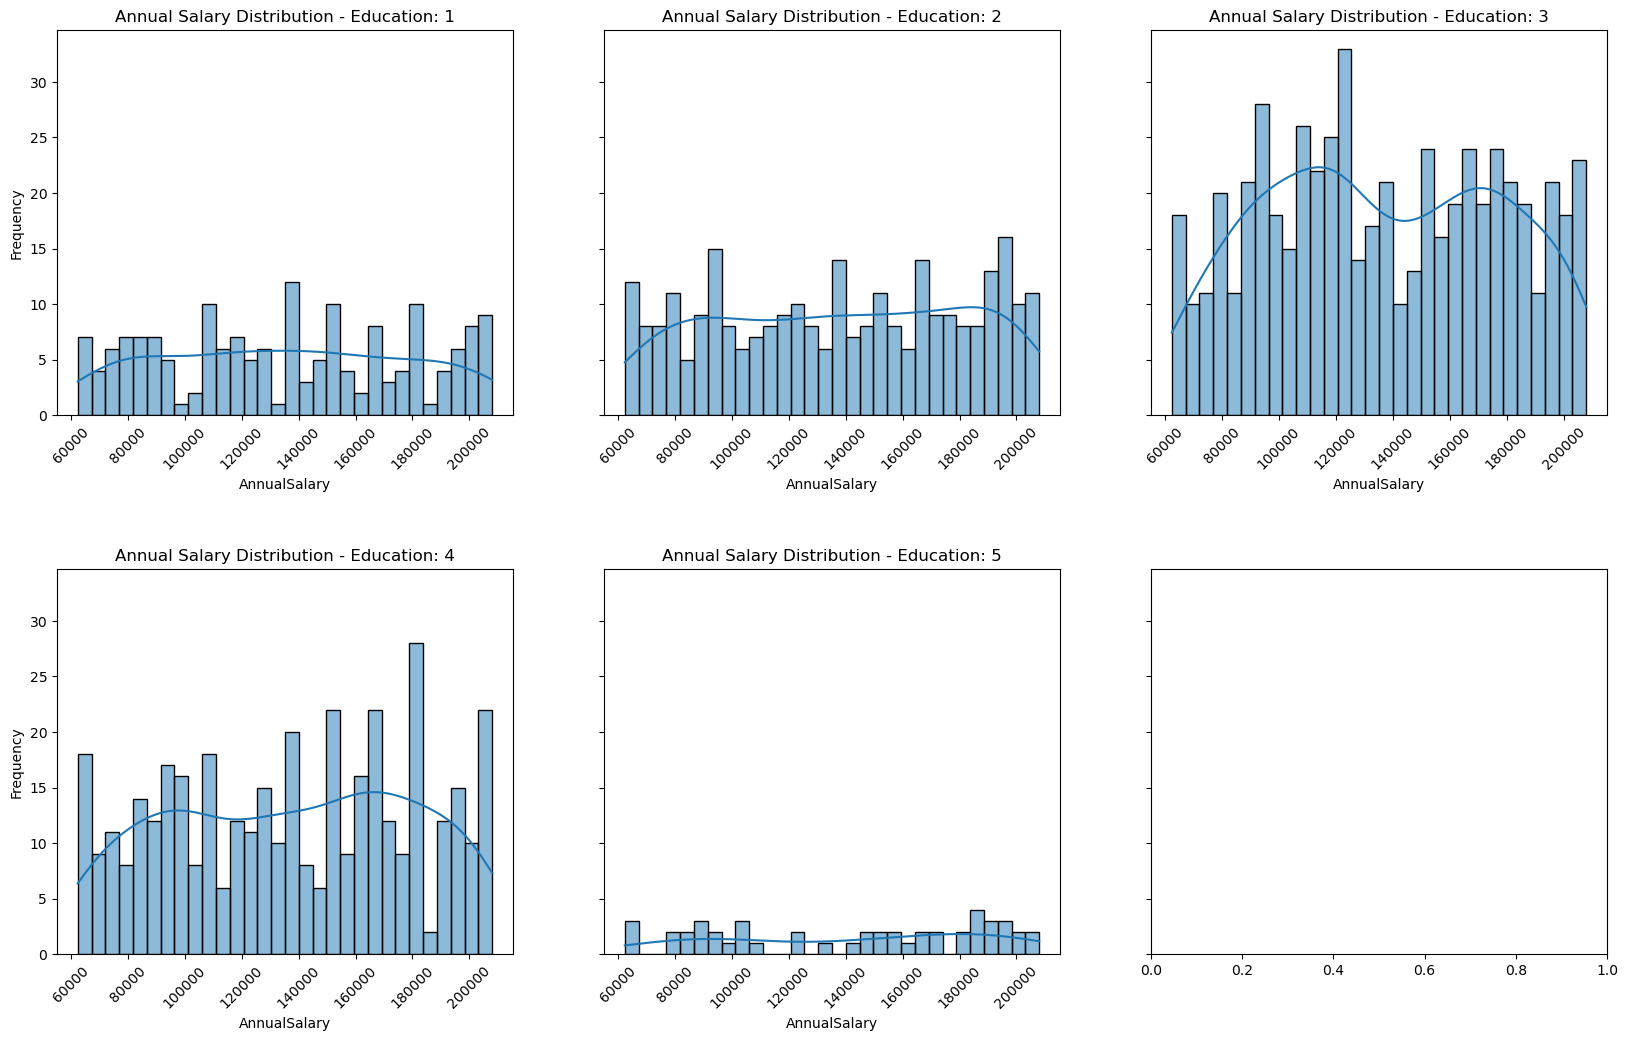

In [7]:
# Distribution by Education

fig, axes = plt.subplots(2, 3, figsize=(20, 12), sharey=True)
education_field = sorted(data['Education'].unique())

for i, field in enumerate(education_field):
    ax = axes[i // 3, i % 3]
    sns.histplot(
        data=data[data['Education'] == field],
        x='AnnualSalary',
        bins=30,
        kde=True,
        ax=ax
    )
    ax.set_title(f'Annual Salary Distribution - Education: {field}')
    # ax.set_xlabel('Annual Salary')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.figure.subplots_adjust(hspace=0.4)

In [14]:
data.columns

Index(['DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction',
       'Gender', 'JobLevel', 'OverTime', 'PercentSalaryHike',
       'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance',
       'YearsAtCompany', 'AnnualSalary', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing Director',
       'JobRole_Research Director', 'JobRole_Research Scientist',
       'JobRole_Sales Executive', 'JobRole_Sales Representative'],
      dtype='object')

Department_Research & Development
Department_Sales


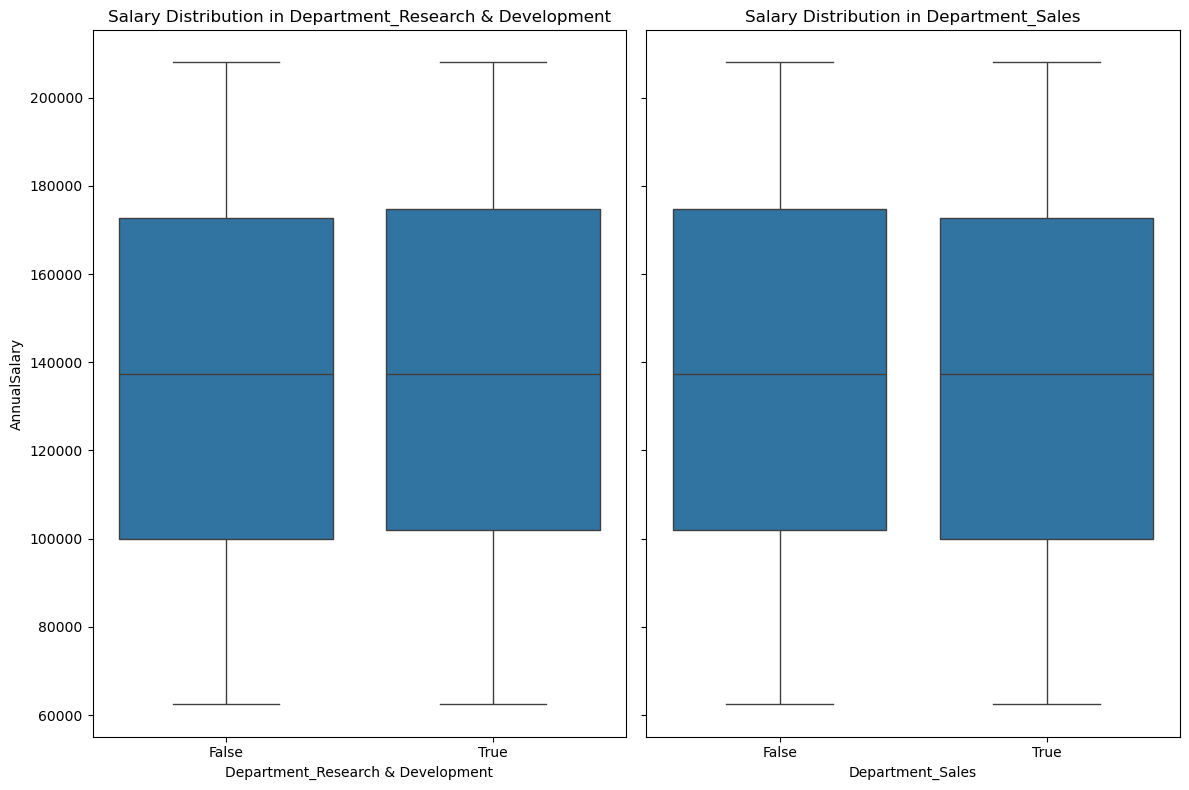

In [31]:
# Distribution by Department

fig, axes = plt.subplots(1, 2, figsize=(12, 8), sharey=True)
departments = data.columns[data.columns.str.startswith('Department_')].tolist()
for i, dept in enumerate(departments):
    ax = axes[i]
    print(dept)
    sns.boxplot(x=dept, y='AnnualSalary', data=data, ax=ax)
    ax.set_title(f'Salary Distribution in {dept}')
plt.tight_layout()
plt.show()

## Multivariate Analysis

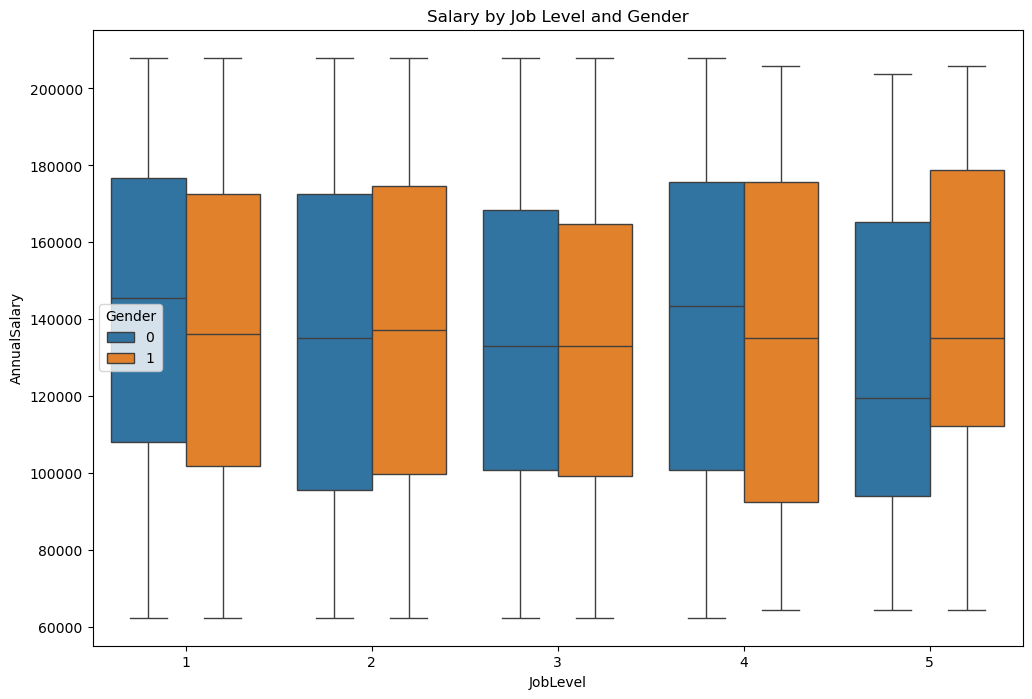

In [27]:
# Multivariate Analysis of pay by Gender within JobLevel
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobLevel', y='AnnualSalary', hue='Gender', data=data)
plt.title('Salary by Job Level and Gender')
plt.show()

## Correlation Matrix

<Axes: >

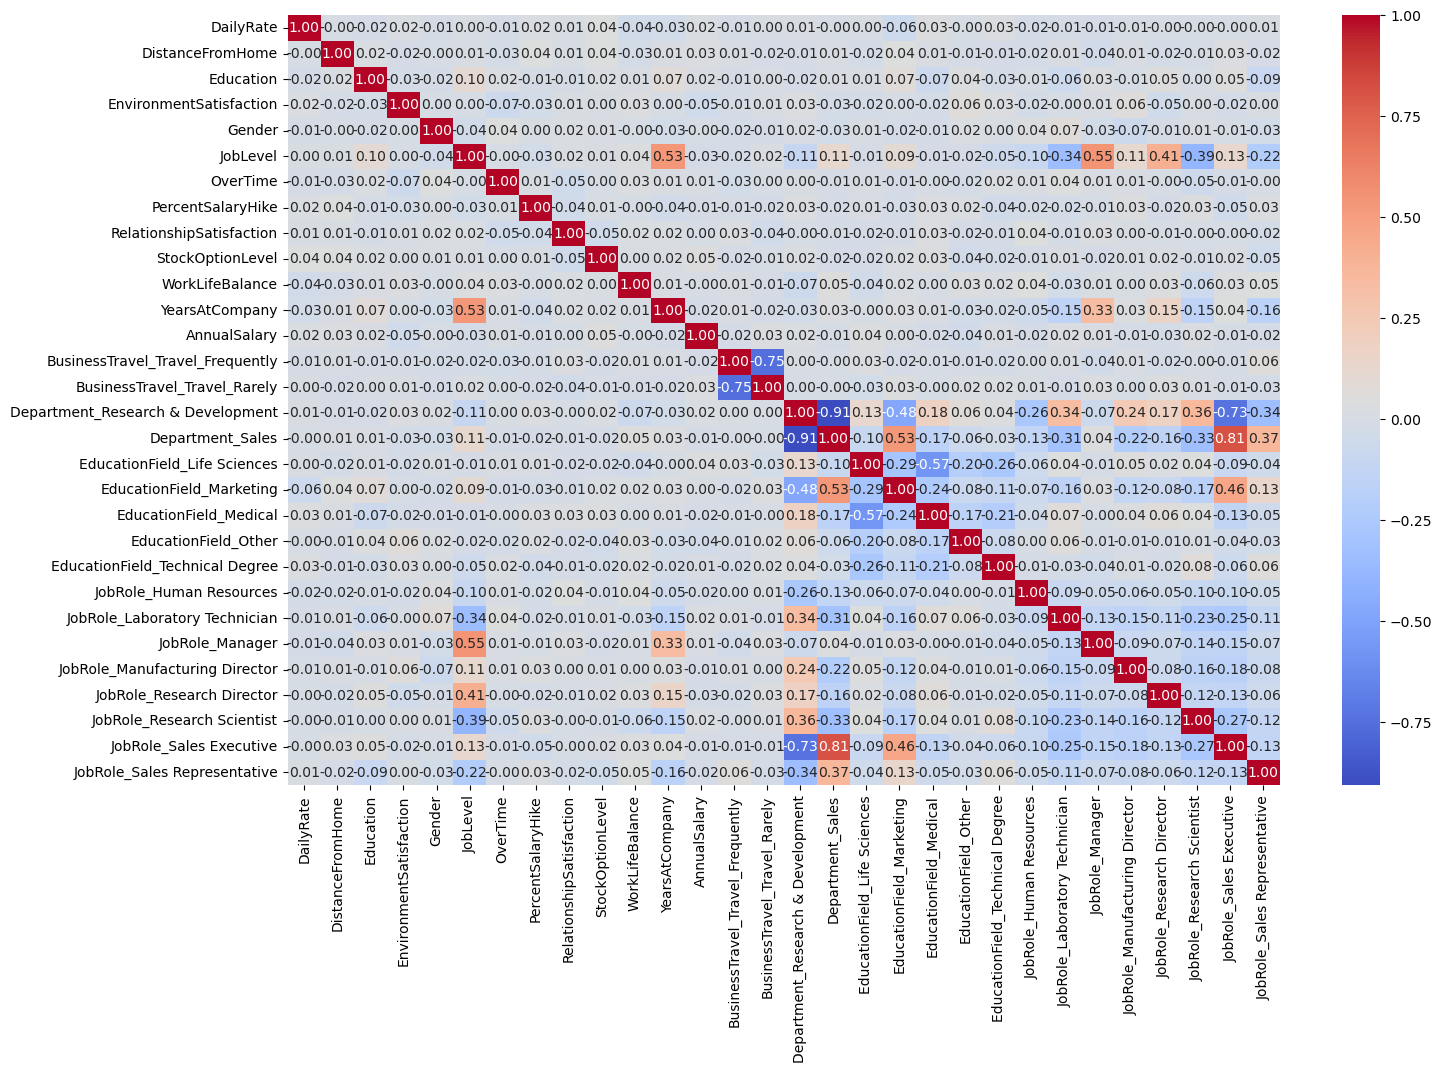

In [26]:
## Correlation Matrix
plt.figure(figsize=(16, 10))
corr = data.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')

“Correlation analysis revealed no strong linear predictors of salary, suggesting that salary is driven by multiple interacting variables. While JobLevel and JobRole showed only moderate correlation with AnnualSalary, they were more strongly associated with each other and with YearsAtCompany. This implies that tenure and managerial status may indirectly influence salary through their relationship to job level. Visualizations further show salary differences across gender even within job levels, which supports the need for a controlled regression model to test for potential pay equity issues.”